In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
np.random.seed(51)

In [ ]:
# Generate two stock prices from N(10,1) and N(10,5) normal distributions
draw1 = np.random.normal(10, 1, 10)
draw2 = np.random.normal(10, 5, 10)

stocks = pd.DataFrame({"A": draw1, "B": draw2}, index=range(10))
stocks.index.name = "Month"

In [11]:
# Returns
stocks["RetsA"] = (stocks.A / stocks.A.shift(1)) - 1
stocks["RetsB"] = (stocks.B / stocks.B.shift(1)) - 1

In [6]:
stocks

,A,B,RetsA,RetsB
Month,,,,
0,9.71,7.47,NaN,NaN
1,10.11,7.08,0.041195,-0.052209
2,11.25,3.63,0.112760,-0.487288
3,8.64,13.73,-0.232000,2.782369
4,10.10,7.21,0.168981,-0.474873
5,9.95,9.45,-0.014851,0.310680
6,9.64,4.06,-0.031156,-0.570370
7,8.91,4.96,-0.075726,0.221675
8,9.65,6.55,0.083053,0.320565


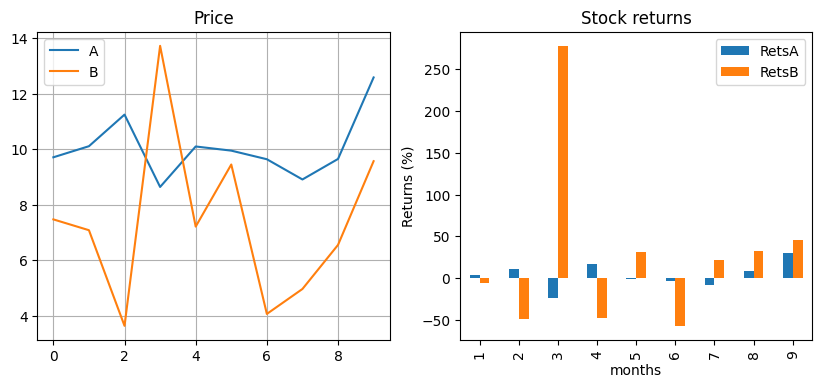

In [7]:
f, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(stocks[["A", "B"]])
ax[0].set_title("Price")
ax[0].legend(["A", "B"])
ax[0].grid()

(stocks[["RetsA", "RetsB"]].drop(index=0, axis=0) * 100).plot.bar(ax=ax[1])
ax[1].set_title("Stock returns")
ax[1].set_xlabel("months")
ax[1].set_ylabel("Returns (%)")
plt.show()

In [10]:
1 + stocks[["RetsA", "RetsB"]].prod()

RetsA    1.000000
RetsB    1.000195
dtype: float64